In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### Example 1

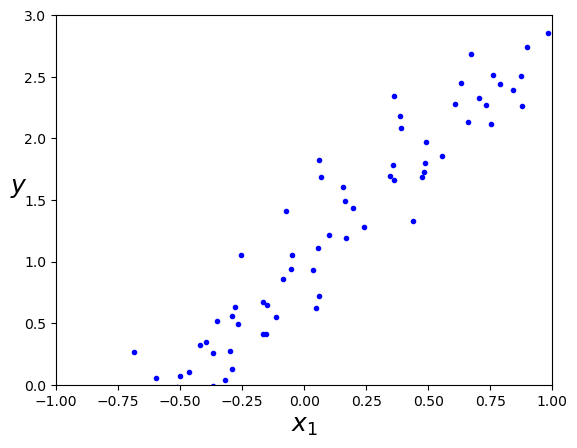

In [15]:
# a linear looking toy dataset
m = 100
X = -1 + 2 * np.random.rand(m, 1) # m random values between -1 and 1 from a uniform distribution
y = 2*X + 1 + 0.25*np.random.randn(m, 1) # y = 2x + 1 + Gaussian noise (from normal distribution)

# plot the dataset
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1, 1, 0, 3])
plt.show()

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# plot the linear regression model
plt.plot(X, y, "b.")
plt.plot(X, lin_reg.predict(X), "r-")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1, 1, 0, 3])
plt.show()

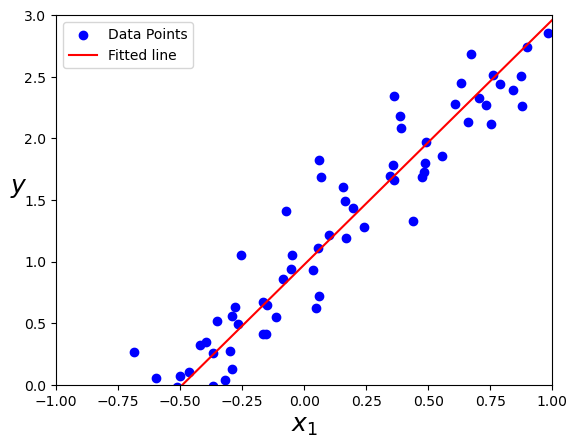

In [27]:
# plot points + fitted line
x_plot = np.linspace(-1, 1, 100).reshape(100, 1) # reshape to 100x1 array
y_plot = lin_reg.predict(x_plot)
plt.scatter(X, y, color='blue')
plt.plot(x_plot, y_plot, color='red')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1, 1, 0, 3])
plt.legend(['Data Points', 'Fitted line'])
plt.show()

### Example 2

In [31]:
# get the data
ad_data = pd.read_csv('../../Data/Advertising.csv')
ad_data.drop('Unnamed: 0', axis=1, inplace=True)

In [35]:
ad_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The features:

- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

The target:

- Sales: sales of a single product in a given market (in thousands of widgets)

In [36]:
X = ad_data[['TV', 'Radio', 'Newspaper']]
y = ad_data['Sales']

In [40]:
# fit model to data
lin_reg.fit(X, y)

# make predictions
y_pred = lin_reg.predict(X)


Intercept:  2.938889369459412
Coefficients:  [ 0.04576465  0.18853002 -0.00103749]


In [44]:
# mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)

print('Mean squared error: ', mse)

# root mean squared error (RMSE)
print('Root mean squared error: ', np.sqrt(mse))

Mean squared error:  2.784126314510936
Root mean squared error:  1.6685701407225697


In [45]:
# the predictions are off by 1.68 units on average (1.68 thousand dollars)

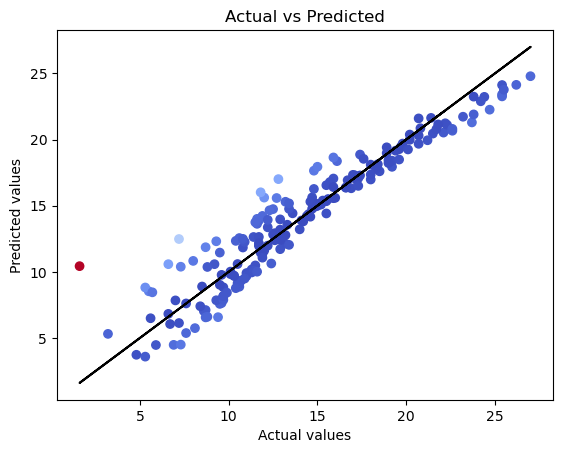

In [49]:
# actual vs predicted (colored by error)
plt.scatter(y, y_pred, c=(y-y_pred)**2, cmap='coolwarm')
# add line
plt.plot(y, y, color='black')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.show()

In [55]:
# print coefficients
print('Intercept: ', lin_reg.intercept_)
print('Coefficients: ', lin_reg.coef_)
# equation
print('y = {:.5f} + {:.5f}*TV + {:.5f}*Radio + {:.5f}*Newspaper'.format(lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1], lin_reg.coef_[2]))
df_coefs = pd.DataFrame({'Variable': ['Intercept', 'TV', 'Radio', 'Newspaper'], 'Coefficient': [lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1], lin_reg.coef_[2]]})
df_coefs

Intercept:  2.938889369459412
Coefficients:  [ 0.04576465  0.18853002 -0.00103749]
y = 2.939 + 0.046*TV + 0.189*Radio + -0.001*Newspaper


,Variable,Coefficient
0,Intercept,2.938889
1,TV,0.045765
2,Radio,0.188530
3,Newspaper,-0.001037


<Axes: xlabel='Variable'>

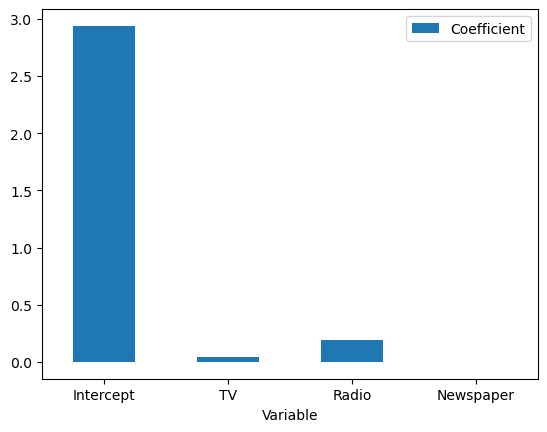

In [58]:
df_coefs.plot.bar(x='Variable', y='Coefficient', rot=0)

Mean squared error:  0.36550197282192093
Root mean squared error:  0.6045675916073577


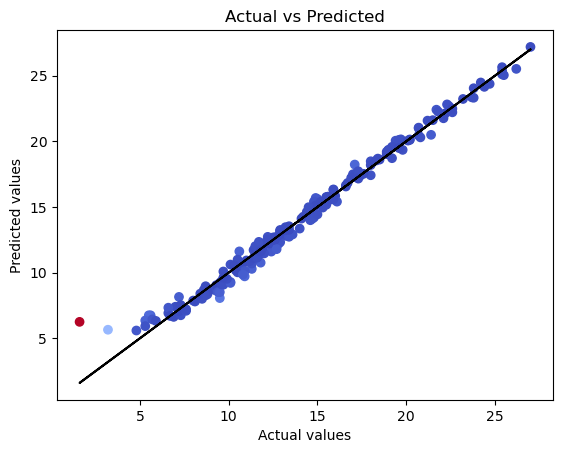

y = 5.08478 + 0.00000*TV + 0.05165*Radio + 0.02107*Newspaper + 0.00688*TV^2 + -0.00011*TV*Radio + 0.00111*TV*Newspaper + -0.00005*Radio^2 + 0.00011*Radio*Newspaper + 0.00008*Newspaper^2


<Axes: xlabel='Variable'>

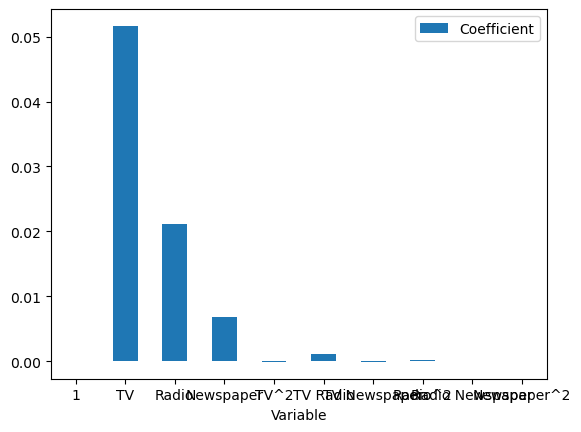

In [70]:
# import pipeline an d polynomial features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# create pipeline
polynomial_features = PolynomialFeatures(degree=2)
linear_regression = LinearRegression()
pipeline = Pipeline(steps=[
    ("polynomial_features", polynomial_features),
    ("linear_regression", linear_regression)
])

# fit model to data
pipeline.fit(X, y)

# make predictions
y_pred = pipeline.predict(X)

# mean squared error
mse = mean_squared_error(y, y_pred)

print('Mean squared error: ', mse)

# root mean squared error (RMSE)
print('Root mean squared error: ', np.sqrt(mse))

# the predictions are off by 0.95 units on average (0.95 thousand dollars)

# actual vs predicted (colored by error)
plt.scatter(y, y_pred, c=(y-y_pred)**2, cmap='coolwarm')
# add line
plt.plot(y, y, color='black')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.show()

# equation
print('y = {:.5f} + {:.5f}*TV + {:.5f}*Radio + {:.5f}*Newspaper + {:.5f}*TV^2 + {:.5f}*TV*Radio + {:.5f}*TV*Newspaper + {:.5f}*Radio^2 + {:.5f}*Radio*Newspaper + {:.5f}*Newspaper^2'.format(linear_regression.intercept_, linear_regression.coef_[0], linear_regression.coef_[1], linear_regression.coef_[2], linear_regression.coef_[3], linear_regression.coef_[4], linear_regression.coef_[5], linear_regression.coef_[6], linear_regression.coef_[7], linear_regression.coef_[8]))
poly_feat_names = pipeline['polynomial_features'].get_feature_names_out()
ply_feat_coefs = pipeline['linear_regression'].coef_
poly_feat_df = pd.DataFrame({'Variable': poly_feat_names, 'Coefficient': pipeline['linear_regression'].coef_})
poly_feat_df.plot.bar(x='Variable', y='Coefficient', rot=0)

In [71]:
# plt.plot(y, 'o')
# plt.plot(y_pred, 'o')
# plt.xlabel('Observations')
# plt.ylabel('Sales')
# plt.legend(['Actual', 'Predicted'])